In [20]:
import pandas as pd

import numpy as np
import lightgbm as lgb
import xgboost as xgb
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score as a
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
# from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import StratifiedKFold, KFold

from matplotlib.pyplot import plot, show
from IPython.display import display

from tqdm import tqdm

# pd.set_option('max_rows', 500) #显示最多行数，超出该数以省略号表示
# pd.set_option('max_columns', 100)

In [21]:
MODEL_TYPE = 'xgb'

LABEL = 'target'

df_train = pd.read_csv('/kaggle/input/xunfei-tangniaobing/train.csv')
df_test = pd.read_csv('/kaggle/input/xunfei-tangniaobing/test.csv')
df_train.shape, df_test.shape

((300000, 23), (100000, 22))

In [3]:
df_test

,id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,300000,1.0,1.000000,1.0,32.000000,0.000000,0.0,0.0,1.0,1.000000,...,1.0,0.0,2.000000,15.000000,30.000000,0.0,0.000000,9.000000,6.000000,8.00000
1,300001,1.0,1.000000,1.0,27.285374,1.000000,0.0,0.0,1.0,0.714626,...,1.0,0.0,4.714626,0.000000,10.570748,1.0,0.000000,12.285374,5.000000,5.00000
2,300002,0.0,0.000000,1.0,36.000000,1.000000,0.0,0.0,1.0,1.000000,...,1.0,0.0,1.000000,0.000000,0.000000,0.0,1.000000,7.000000,6.000000,8.00000
3,300003,0.0,0.000000,1.0,24.098520,1.000000,0.0,0.0,1.0,1.000000,...,1.0,0.0,2.000000,0.000000,0.000000,0.0,1.000000,5.000000,4.000000,4.09852
4,300004,0.0,1.000000,1.0,21.000000,0.000000,0.0,1.0,1.0,0.000000,...,1.0,1.0,5.000000,30.000000,30.000000,1.0,0.000000,6.000000,5.000000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,399995,0.0,0.000000,1.0,23.000000,0.000000,0.0,0.0,1.0,1.000000,...,1.0,0.0,2.000000,0.000000,5.000000,0.0,1.000000,6.000000,6.000000,8.00000
99996,399996,0.0,0.000000,1.0,31.000000,1.000000,0.0,0.0,0.0,0.000000,...,1.0,0.0,4.000000,30.000000,0.000000,0.0,0.000000,8.000000,4.000000,6.00000
99997,399997,0.0,0.000000,1.0,35.000000,0.000000,0.0,0.0,1.0,0.000000,...,1.0,0.0,2.000000,0.000000,0.000000,0.0,1.000000,2.000000,5.000000,7.00000
99998,399998,0.0,0.000000,1.0,26.000000,0.232066,0.0,0.0,1.0,1.000000,...,1.0,0.0,3.000000,0.000000,0.000000,0.0,0.000000,11.767934,5.000000,5.00000


# EDA 探索性数据分析

Text(0, 0.5, 'target')

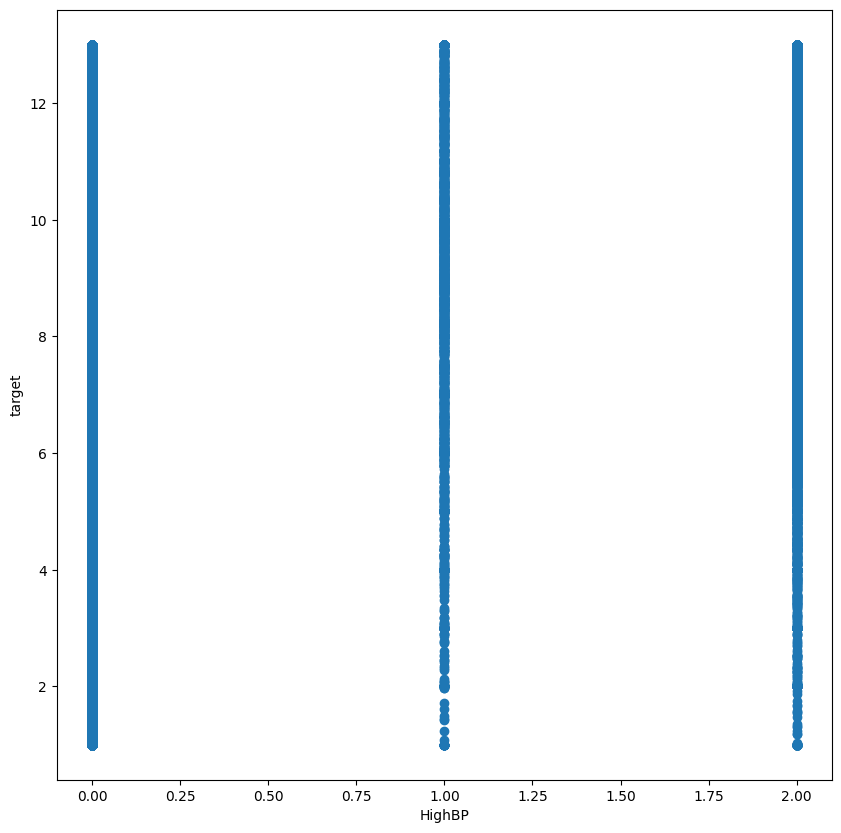

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(y='Age',x='target',data=df_train)
plt.xlabel('HighBP')
plt.ylabel('target')

此外再补充一个在使用pandas过程中将数据显示全的小技巧：在做可视化分析的时候我们通常希望尽可能多地观察数据，不希望总是出现 “...” 这种行列被省略而显示不全的情况。为了达到这个目的我们可以写入以下代码：

In [3]:
import seaborn as sns

#显示Dateframe所有列(参数设置为None代表显示所有行，也可以自行设置数字)
pd.set_option('display.max_columns',None)
#显示Dateframe所有行
pd.set_option('display.max_rows',None)
#设置Dataframe数据的显示长度，默认为50
pd.set_option('max_colwidth',200)
#禁止Dateframe自动换行(设置为Flase不自动换行，True反之)
pd.set_option('expand_frame_repr', False)

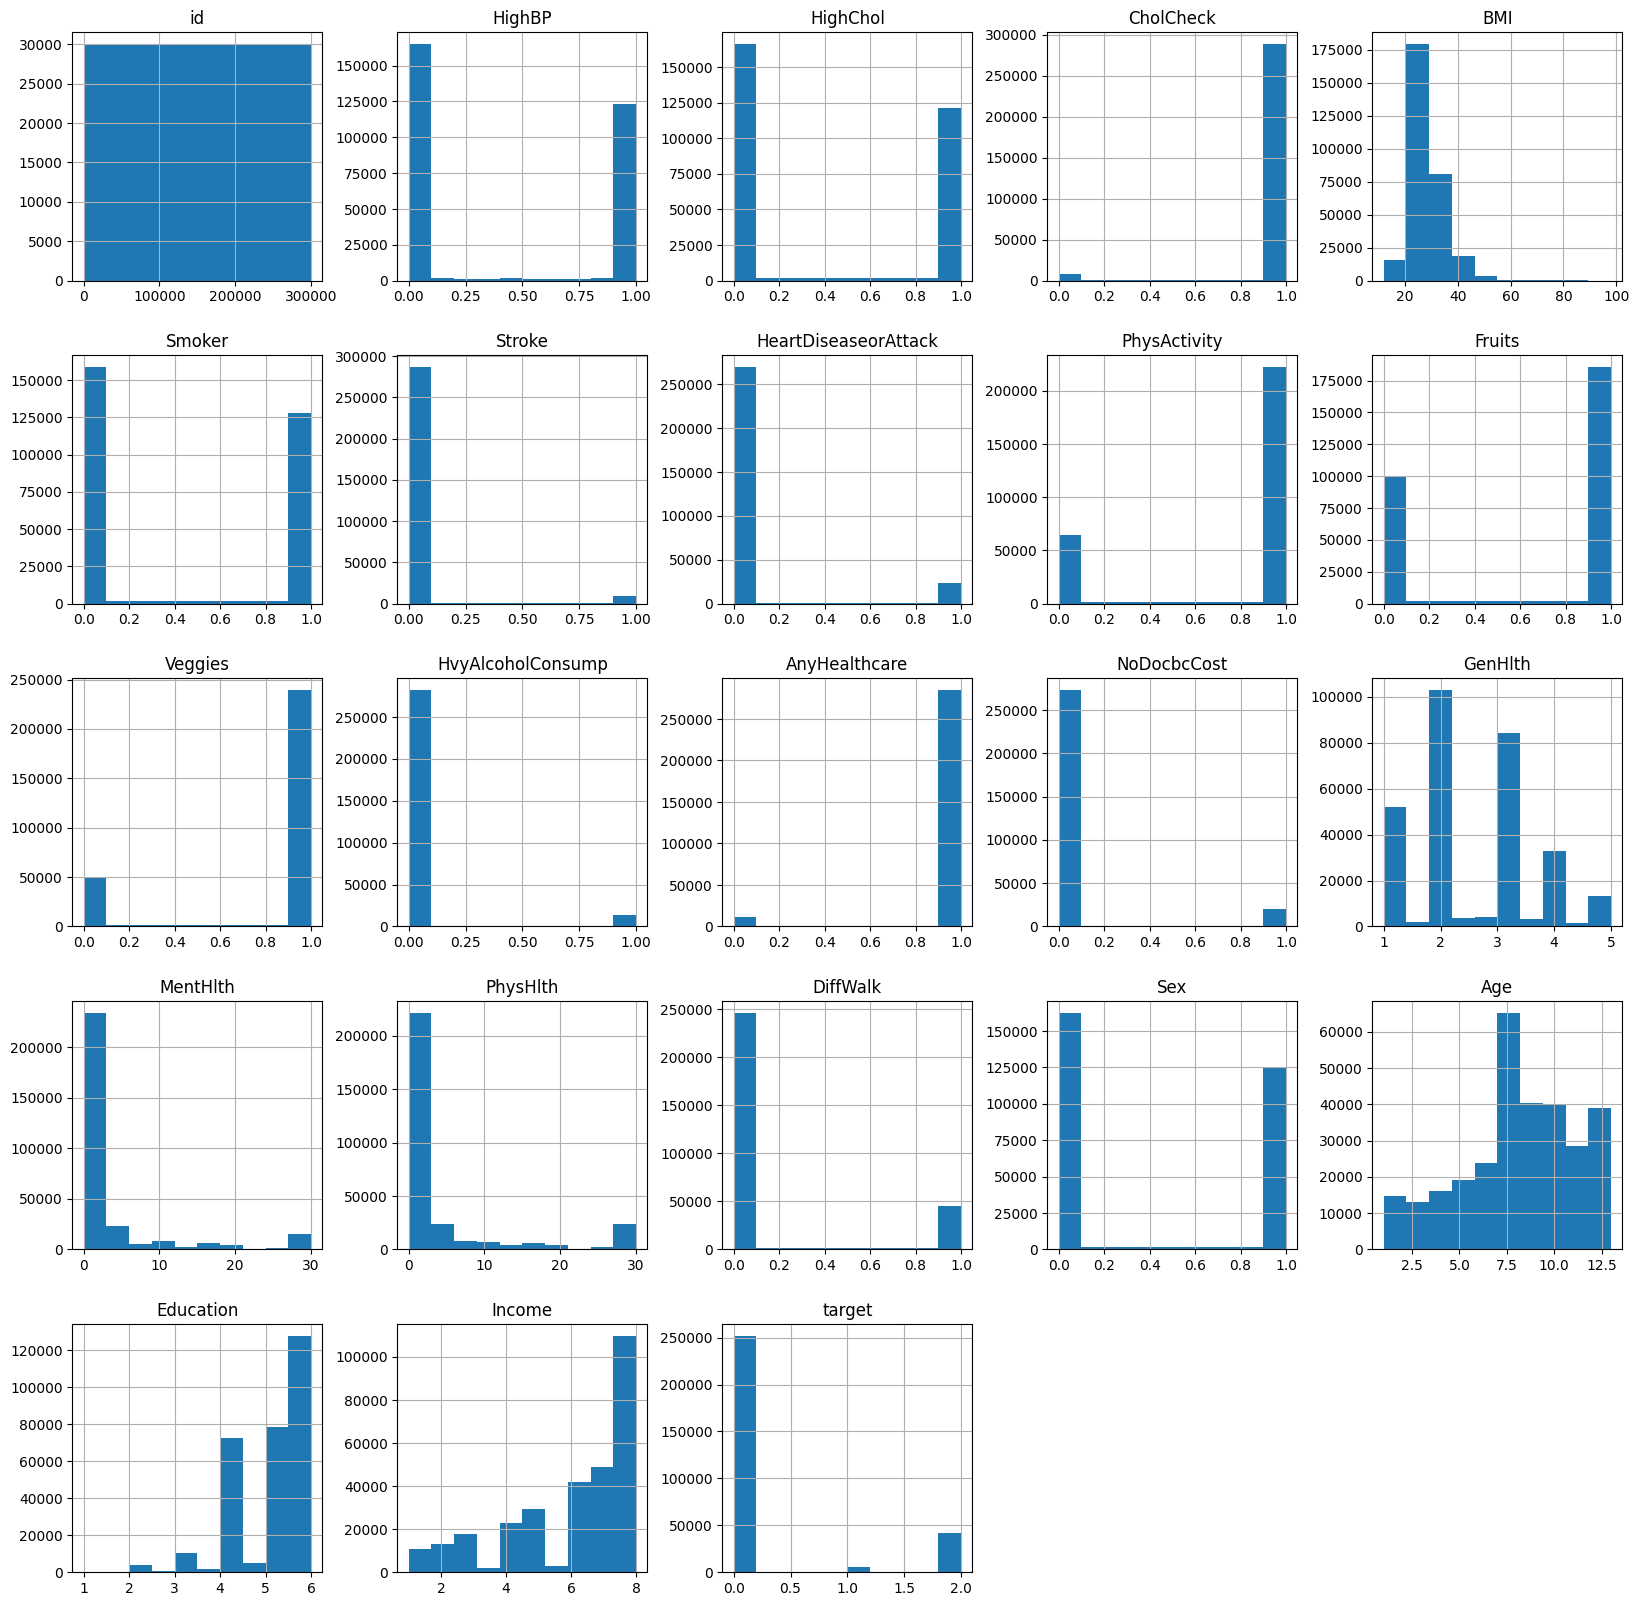

In [5]:
p = df_train.hist(figsize = (20,20))

KeyboardInterrupt: 

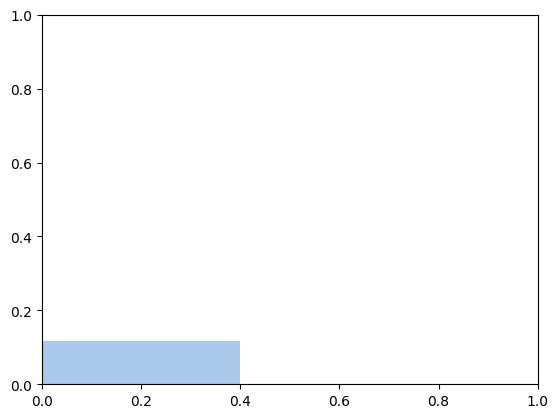

In [65]:
# 未使用
sns.barplot(x="HighBP", y="target", data=df_train[['HighBP','target']], palette="pastel")

Age和target之间的关系

In [ ]:
# 概率密度图
facet = sns.FacetGrid(df_train, hue="target",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
plt.xlabel('Age') 
plt.ylabel('density') 

为什么age只有12，因此近一步看看年龄的大小

In [9]:
print('{} : {}'.format("Age",df_train["Age"].unique()))

Age : [6.         7.         9.         ... 7.05983641 7.1244989  9.29086049]


In [10]:
age_counts = df_train["Age"].value_counts()  
print(age_counts)  

Age
9.000000     35505
10.000000    35398
8.000000     33041
7.000000     28122
11.000000    25361
             ...  
5.172177         1
12.413754        1
10.813868        1
7.422790         1
9.290860         1
Name: count, Length: 29177, dtype: int64


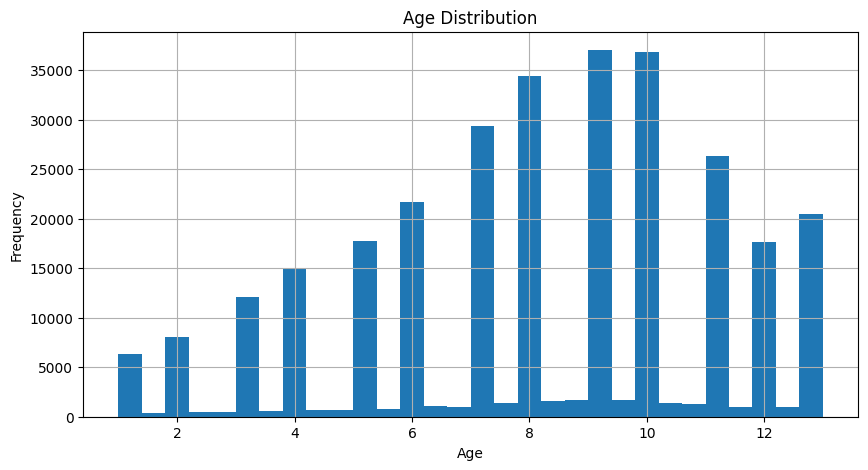

In [10]:
df_train['Age'].hist(bins=30, figsize=(10,5))  # bins参数表示分组的数量，figsize参数表示图形的大小  
plt.xlabel('Age')  
plt.ylabel('Frequency')  
plt.title('Age Distribution')  
plt.show()

In [4]:
max_age = df_train['Age'].max()  
min_age = df_train['Age'].min()  
  
print("最大值：", max_age)  
print("最小值：", min_age)


最大值： 13.0
最小值： 1.0


再去看看test

In [67]:
age_counts = df_test["Age"].value_counts()  
print(age_counts)  

Age
9.000000     11112
10.000000    10197
8.000000      9848
7.000000      8314
11.000000     7311
6.000000      6506
5.000000      5458
13.000000     5399
4.000000      4942
12.000000     4802
3.000000      3937
2.000000      2683
1.000000      2064
4.376522         1
12.787642        1
11.910167        1
6.044404         1
10.630770        1
8.048884         1
7.335946         1
7.799070         1
9.940421         1
10.734412        1
5.913128         1
7.819109         1
10.967476        1
9.873203         1
8.264967         1
2.482743         1
1.184709         1
1.081458         1
10.163932        1
4.489365         1
10.033919        1
5.829013         1
4.243652         1
5.163192         1
9.858787         1
8.870688         1
10.196688        1
4.048262         1
7.754627         1
7.895687         1
8.177563         1
6.660885         1
6.063253         1
10.267681        1
11.621384        1
6.230269         1
12.281135        1
4.387677         1
4.198410         1
10.02584

上面那个统计图可以看出1.0的数据分布，和其他的不一样，因为近一步看看

In [13]:
age_counts = df_train.loc[df_train['target'] == 1.0, 'Age'].value_counts()  
  
print( age_counts)

Age
10.000000    751
9.000000     739
11.000000    611
8.000000     536
13.000000    520
12.000000    451
7.000000     435
6.000000     278
5.000000     143
4.000000     125
3.000000      79
2.000000      43
1.000000      18
4.681631       1
7.582962       1
8.611941       1
11.428887      1
5.003528       1
6.180595       1
6.901126       1
11.724452      1
11.050870      1
8.119433       1
7.950158       1
2.453822       1
8.869606       1
10.325741      1
8.731153       1
2.901417       1
9.327045       1
11.180196      1
8.018293       1
3.175486       1
8.311899       1
9.149260       1
2.125234       1
8.592812       1
9.723128       1
12.636491      1
7.600610       1
8.124714       1
5.352853       1
12.738069      1
10.082715      1
10.104137      1
7.549343       1
8.973498       1
11.829332      1
12.887965      1
6.219117       1
5.823729       1
9.216973       1
6.473569       1
8.450416       1
10.598694      1
7.816514       1
10.341782      1
8.372007       1
6.127988  

In [ ]:
#数据应该是被分过桶了，因此尝试把年龄为小数的四舍五入成整数

查看一下label

HighBP也存在很多小数，按照道理来说应该只是0和1

In [15]:
age_counts = df_test["HighBP"].value_counts()  
print(age_counts)  

HighBP
0.000000    53745
1.000000    37802
0.845187        1
0.687392        1
0.327963        1
0.812317        1
0.349864        1
0.985724        1
0.140006        1
0.069532        1
0.000823        1
0.188570        1
0.182832        1
0.011266        1
0.778335        1
0.458710        1
0.891187        1
0.279914        1
0.104010        1
0.144566        1
0.791004        1
0.965610        1
0.382377        1
0.058036        1
0.133291        1
0.094458        1
0.979861        1
0.618183        1
0.659996        1
0.299736        1
0.748773        1
0.532910        1
0.803312        1
0.464146        1
0.592795        1
0.321453        1
0.687728        1
0.185734        1
0.391630        1
0.636627        1
0.790560        1
0.005192        1
0.993423        1
0.839901        1
0.915290        1
0.313674        1
0.922063        1
0.154328        1
0.433017        1
0.514767        1
0.435367        1
0.233741        1
0.303039        1
0.882793        1
0.181522        1
0.9

In [16]:
age_counts = df_test["HighChol"].value_counts()  
print(age_counts)  

HighChol
0.000000    53841
1.000000    36915
0.352815        1
0.548207        1
0.893080        1
0.038756        1
0.967476        1
0.389841        1
0.200930        1
0.401646        1
0.265588        1
0.851676        1
0.907073        1
0.440874        1
0.089833        1
0.352918        1
0.051151        1
0.398925        1
0.815291        1
0.942901        1
0.816705        1
0.888272        1
0.951216        1
0.718865        1
0.927901        1
0.724675        1
0.758094        1
0.109441        1
0.129558        1
0.261008        1
0.827813        1
0.406926        1
0.305311        1
0.581532        1
0.028881        1
0.269485        1
0.036757        1
0.336734        1
0.981748        1
0.310215        1
0.791004        1
0.725890        1
0.512458        1
0.650839        1
0.617623        1
0.965610        1
0.413923        1
0.873617        1
0.052643        1
0.687392        1
0.282726        1
0.645531        1
0.330610        1
0.020041        1
0.119248        1
0

In [19]:
age_counts = df_train.loc[df_train['target'] == 2.0, 'CholCheck'].value_counts()  
  
print( age_counts)

CholCheck
1.000000    41658
0.000000      195
0.126110        1
0.574709        1
0.306773        1
0.516660        1
0.328746        1
0.667548        1
0.630239        1
0.520386        1
0.364228        1
0.012137        1
0.057656        1
0.629196        1
0.354306        1
0.602512        1
0.511902        1
0.670638        1
0.332764        1
0.114717        1
0.989923        1
0.975166        1
0.452763        1
0.221423        1
0.100090        1
0.821588        1
0.100319        1
0.639115        1
0.997784        1
0.564813        1
0.033393        1
0.423239        1
0.659490        1
0.734694        1
0.821831        1
0.321684        1
0.571146        1
0.415775        1
0.544180        1
0.378196        1
0.848736        1
0.559003        1
0.670264        1
0.363246        1
0.518890        1
0.013678        1
0.539679        1
0.765190        1
0.597844        1
0.929021        1
0.263698        1
0.208025        1
0.230966        1
0.911718        1
0.696139        1


In [17]:
age_counts = df_test["CholCheck"].value_counts()  
print(age_counts)  

CholCheck
1.000000    95466
0.000000     2491
0.576838        1
0.772398        1
0.822437        1
0.185057        1
0.335946        1
0.602314        1
0.183295        1
0.337900        1
0.169746        1
0.631322        1
0.725590        1
0.718865        1
0.325871        1
0.956146        1
0.709644        1
0.633964        1
0.435738        1
0.751156        1
0.702937        1
0.103494        1
0.613893        1
0.617371        1
0.370694        1
0.284878        1
0.375770        1
0.340375        1
0.037831        1
0.384758        1
0.703726        1
0.246268        1
0.815182        1
0.596137        1
0.164700        1
0.578577        1
0.803616        1
0.107302        1
0.003320        1
0.293869        1
0.819310        1
0.644103        1
0.831053        1
0.916030        1
0.466808        1
0.049614        1
0.433017        1
0.267469        1
0.392739        1
0.450400        1
0.218190        1
0.093985        1
0.086708        1
0.176154        1
0.056070        1


In [20]:
age_counts = df_test["Smoker"].value_counts()  
print(age_counts)  

Smoker
0.000000    54209
1.000000    35737
0.205066        1
0.835598        1
0.643514        1
0.115801        1
0.499825        1
0.442299        1
0.023459        1
0.650092        1
0.862746        1
0.593074        1
0.325871        1
0.868367        1
0.141592        1
0.377591        1
0.519385        1
0.269485        1
0.783618        1
0.588887        1
0.049262        1
0.231481        1
0.735268        1
0.892758        1
0.841480        1
0.806351        1
0.613893        1
0.891821        1
0.243295        1
0.219318        1
0.982483        1
0.878628        1
0.014245        1
0.104867        1
0.507391        1
0.583130        1
0.778292        1
0.167447        1
0.899667        1
0.445960        1
0.734608        1
0.340897        1
0.183295        1
0.564262        1
0.520892        1
0.320728        1
0.129312        1
0.251227        1
0.945618        1
0.535145        1
0.815182        1
0.995802        1
0.557606        1
0.124438        1
0.218190        1
0.2

In [60]:
age_counts = df_test["DiffWalk"].value_counts()  
print(age_counts) 

DiffWalk
0.000000    80886
1.000000    13492
0.527991        1
0.603729        1
0.160309        1
0.140987        1
0.515979        1
0.678547        1
0.494860        1
0.327963        1
0.088057        1
0.861019        1
0.226641        1
0.543354        1
0.645531        1
0.282726        1
0.126383        1
0.791004        1
0.965610        1
0.487542        1
0.663197        1
0.092537        1
0.761726        1
0.165644        1
0.061414        1
0.249287        1
0.109168        1
0.885841        1
0.810983        1
0.806625        1
0.704965        1
0.552689        1
0.104300        1
0.151432        1
0.452288        1
0.225466        1
0.992642        1
0.303039        1
0.882793        1
0.504981        1
0.763374        1
0.166378        1
0.415385        1
0.545516        1
0.505512        1
0.011390        1
0.871899        1
0.275325        1
0.530798        1
0.261008        1
0.048784        1
0.650092        1
0.976541        1
0.442299        1
0.198410        1
0

In [22]:
age_counts = df_test["Income"].value_counts()  
print(age_counts) 

Income
8.000000    32308
7.000000    13965
6.000000    11844
5.000000     8084
4.000000     6042
3.000000     4894
1.000000     4018
2.000000     3537
7.899616        1
7.679272        1
7.633931        1
6.479108        1
7.955593        1
6.981748        1
5.131665        1
6.689785        1
2.538562        1
5.463458        1
3.815291        1
6.641257        1
2.741377        1
7.791374        1
5.393376        1
4.048262        1
4.052776        1
6.965623        1
7.251227        1
7.794450        1
5.339115        1
3.070290        1
2.184818        1
7.957815        1
2.609708        1
2.771127        1
4.750723        1
7.514296        1
6.143377        1
6.271536        1
4.151085        1
1.269485        1
6.299890        1
4.960600        1
4.776544        1
1.265392        1
3.183295        1
6.557606        1
7.621384        1
4.819392        1
4.936747        1
5.930884        1
7.664544        1
7.126797        1
3.563920        1
5.799070        1
3.598354        1
7.0

In [23]:
age_counts = df_test["Sex"].value_counts()  
print(age_counts) 

Sex
0.000000    51385
1.000000    39016
0.598008        1
0.861185        1
0.702937        1
0.644906        1
0.108179        1
0.142442        1
0.243295        1
0.260666        1
0.079913        1
0.780682        1
0.323652        1
0.107242        1
0.227602        1
0.799659        1
0.507391        1
0.416870        1
0.832553        1
0.243526        1
0.212398        1
0.861754        1
0.836429        1
0.571907        1
0.590764        1
0.319868        1
0.284878        1
0.965792        1
0.537860        1
0.330859        1
0.738862        1
0.329716        1
0.629306        1
0.203717        1
0.197314        1
0.972461        1
0.059458        1
0.387630        1
0.116589        1
0.014245        1
0.017010        1
0.405325        1
0.608127        1
0.634059        1
0.581532        1
0.028881        1
0.960600        1
0.120378        1
0.486123        1
0.177659        1
0.557606        1
0.040726        1
0.809099        1
0.936747        1
0.265588        1
0.1687

In [11]:
df_train['target'].value_counts()


target
0.0    252000
2.0     42000
1.0      6000
Name: count, dtype: int64

## 类别不均衡

In [22]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# 假设 df_train 包含了特征和目标变量
X_train = df_train.drop(columns=['target'])  # 提取特征，去除目标变量列
y_train = df_train['target']  # 提取目标变量列

# 计算多数类别和少数类别的样本数量
majority_class_count = y_train.value_counts().max()
minority_class_count = y_train.value_counts().min()

# 使用SMOTE只增加少数类别的样本
smote = SMOTE(sampling_strategy={1.0: minority_class_count*6}, random_state=42)  
#少数类别的标签是1 
#majority_class_count是指过采样后的该类别数量
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 将生成的合成样本转换为DataFrame
df_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
df_resampled['target'] = y_train_resampled

# 打印合并后的训练集的类别分布
print(df_resampled['target'].value_counts())
# 替换回来
df_train = df_resampled

target
0.0    252000
2.0     42000
1.0     36000
Name: count, dtype: int64


### RandomOverSampler来缓解类别不均衡的情况

In [12]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# 假设 df_train 包含了特征和目标变量
X_train = df_train.drop(columns=['target'])  # 提取特征，去除目标变量列
y_train = df_train['target']  # 提取目标变量列

# 选择要过采样的特定类别
class_to_oversample = 1  # 例如，假设要过采样类别为1的样本

# 计算多数类别和少数类别的样本数量
majority_class_count = df_train['target'].value_counts().max()
minority_class_count = df_train['target'].value_counts().min()

# 计算desired_samples以平衡类别
# desired_samples = majority_class_count - minority_class_count
desired_samples = minority_class_count * 5

# 创建一个过采样器，并设置特定类别的采样策略
oversampler = RandomOverSampler(sampling_strategy={class_to_oversample: desired_samples}, random_state=42)

# 过采样特定类别的样本
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# 将生成的合成样本转换为DataFrame
df_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
df_resampled['target'] = y_train_resampled
# 替换回来
df_train = df_resampled


In [23]:
# 打印合并后的训练集的类别分布
print(df_resampled['target'].value_counts())

target
0.0    252000
2.0     42000
1.0     36000
Name: count, dtype: int64


In [15]:
ge_counts = df_test["HighBP"].value_counts()  
print(age_counts)  

Age
9.000000     35505
10.000000    35398
8.000000     33041
7.000000     28122
11.000000    25361
             ...  
5.172177         1
12.413754        1
10.813868        1
7.422790         1
9.290860         1
Name: count, Length: 29177, dtype: int64


In [6]:
df_train['target'].value_counts()

target
0.0    252000
2.0     42000
1.0     30000
Name: count, dtype: int64

In [19]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# 假设 df_train 包含了特征和目标变量
X_train = df_train.drop(columns=['target'])  # 提取特征，去除目标变量列
y_train = df_train['target']  # 提取目标变量列

# 计算多数类别和少数类别的样本数量
majority_class_count = y_train.value_counts().max()
minority_class_count = y_train.value_counts().min()

# 使用SMOTE只增加少数类别的样本
smote = SMOTE(sampling_strategy={2.0: 42000*2}, random_state=42)  
#少数类别的标签是1 
#majority_class_count是指过采样后的该类别数量
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 将生成的合成样本转换为DataFrame
df_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
df_resampled['target'] = y_train_resampled

# 打印合并后的训练集的类别分布
print(df_resampled['target'].value_counts())


target
0.0    252000
2.0     84000
1.0     60000
Name: count, dtype: int64


In [25]:
df_train = df_resampled

## 查看每一列的缺失值情况

In [3]:
df_train.isnull().sum()

id                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
target                  0
dtype: int64

### 

In [5]:
for col in df_train.columns:
    print('{} : {}'.format(col,df_train[col].unique()))

id : [     0      1      2 ... 299997 299998 299999]
HighBP : [0.         1.         0.12158694 ... 0.99691373 0.08981215 0.1244989 ]
HighChol : [0.         1.         0.22289339 ... 0.75307009 0.1244989  0.53831152]
CholCheck : [1.         0.62674664 0.         ... 0.22891309 0.90825358 0.84623573]
BMI : [18.11946005 28.         32.         ... 27.91817236 39.91018785
 30.8755011 ]
Smoker : [1.         0.         0.38878567 ... 0.16461972 0.20307059 0.57883865]
Stroke : [0.         0.38878567 0.02774767 ... 0.84392189 0.18509666 0.91287721]
HeartDiseaseorAttack : [0.         0.65714535 0.76090461 ... 0.00308627 0.87426247 0.20307059]
PhysActivity : [1.         0.         0.62674664 ... 0.41382747 0.84623573 0.3928958 ]
Fruits : [1.         0.         0.22289339 ... 0.91018785 0.16461972 0.6071042 ]
Veggies : [1.         0.         0.37325336 ... 0.13306788 0.05983641 0.86520413]
HvyAlcoholConsump : [0.         1.         0.19441575 ... 0.75307009 0.91287721 0.29086049]
AnyHealthcare :

# 特征工程

In [24]:
df = pd.concat([df_train, df_test])

###colcol 根据前面的分析，出现了很多不应该不为小数的数，因为把他们四舍五入一下

In [19]:
# cols = df.column
cols = ['Sex',"Smoker"]
for col in cols:
    df[col] = df[col].round()  
    

In [21]:
age_counts = df["Income"].value_counts()  
print(age_counts) 

Income
8.000000    142427
7.000000     62402
6.000000     53880
5.000000     36947
4.000000     28167
             ...  
1.550179         1
7.075940         1
4.618051         1
4.352340         1
3.831995         1
Name: count, Length: 41962, dtype: int64


In [77]:
#BMI和年龄的交互项：
# 创建一个新的特征，表示BMI与年龄的交互作用。
# 这可以通过将BMI乘以年龄来实现，以捕捉年龄对BMI的影响。

df['BMI_Age_Interact'] = df['BMI'] * df['Age']

In [78]:
df['Age_HeartDisease_Interact'] = df['Age'] * df['HeartDiseaseorAttack']
df['Age_Smoker_Interact'] = df['Age'] * df['Smoker']

In [79]:
# # 示例代码
# bins = [0, 18.5, 24.9, 29.9, 100]  # 定义BMI范围的边界
# # labels = ['Underweight', 'Normal', 'Overweight', 'Obese']  # 定义BMI范围的标签
# labels = [0,1,2,3]
# df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

年龄分段特征：
将年龄特征分为不同的年龄段，并创建一个新的分类特征，表示每个样本属于哪个年龄段。

根据EDA年龄已经分过桶了，这里把为小数的年龄四舍五入


**身体活动和膳食习惯综合评分：**

创建一个新的特征，代表身体活动水平和水果蔬菜消费的综合评分。您可以对这两个特征进行加权相加，以捕捉健康生活方式的综合影响。


In [80]:
df['Health_Lifestyle_Score'] = 0.4 * df['PhysActivity'] + 0.6 * (df['Fruits'] + df['Veggies']) / 2


**教育水平和收入的组合特征：**

创建一个新的特征，代表教育水平和收入的组合特征。您可以将两个特征相乘或相加，以探索它们之间的关系。

In [48]:
df['Education_Income_Combined'] = df['Education'] * df['Income']


**吸烟与饮酒习惯的综合评分：**

创建一个新的特征，代表吸烟与饮酒习惯的综合评分。您可以对这两个特征进行加权相加，以捕捉不健康生活方式的综合影响

In [81]:
df['Unhealthy_Lifestyle_Score'] = 0.7 * df['Smoker'] + 0.3 * df['HvyAlcoholConsump']

**疾病风险指标：**

创建一个新的特征，表示疾病风险指标，结合了高血压、高酒精、胆固醇检查和心脏疾病的信息。您可以根据领域知识或专业建议创建这个指标

In [82]:

df['Disease_Risk_Index'] = (df['HighBP'] + df['HighChol'] + df['CholCheck'] + df['HeartDiseaseorAttack']) / 4


**健康状况综合得分：**

创建一个新的特征，代表健康状况的综合得分，结合了健康、心理健康和身体健康的信息。您可以根据不同特征的重要性进行加权相加。

In [83]:
df['Overall_Health_Score'] = 0.3 * df['GenHlth'] + 0.3 * df['MentHlth'] + 0.4 * df['PhysHlth']


**医疗保健和医疗成本特征：**

创建一个新的特征，表示医疗保健情况和医疗成本的综合信息。您可以结合是否接受医疗保健和就医成本等信息。

In [84]:
df['Healthcare_Info'] = df['AnyHealthcare'] * (1 - df['NoDocbcCost'])


**性别和教育水平的组合特征：**

创建一个新的特征，结合了性别和教育水平的信息，以探索性别在不同教育水平下的影响。

In [85]:
df['Gender_Education'] = df['Sex'] * df['Education']


**身体活动和走路困难的综合评分：**

创建一个新的特征，代表身体活动水平和走路/爬楼困难的综合评分。您可以对这两个特征进行加权相加，以捕捉活动水平和生活方式的影响。

In [86]:
df['Physical_Activity_Lifestyle_Score'] = 0.6 * df['PhysActivity'] + 0.4 * df['DiffWalk']


**每个样本吃水果和蔬菜的总量。**

In [87]:
df['Total_Fruits'] = df['Fruits'] + df['Veggies']

#### 正则化

In [27]:
columns_to_normalize = [f for f in df if f not in [LABEL, "id"]]
df[columns_to_normalize] = df[columns_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))  
  

In [7]:
from sklearn.preprocessing import StandardScaler
# 定义需要归一化的特征列的名称
features_to_normalize = [f for f in df if f not in [LABEL, "id"]]

# 创建一个 StandardScaler 实例
scaler = StandardScaler()

# 对需要归一化的特征进行归一化
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])


In [8]:
df.head()

,id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
0,0,-0.912794,-0.904737,0.19021,-1.587496,1.163616,-0.210008,-0.333818,0.584735,0.780125,...,-0.313796,-0.513125,-0.184478,-0.499301,-0.470629,-0.911387,-0.697185,0.995027,0.963976,0.0
1,1,-0.912794,1.178972,0.19021,-0.076667,1.163616,-0.210008,-0.333818,0.584735,0.780125,...,-0.313796,-0.513125,-0.168357,-0.499301,-0.470629,-0.911387,-0.364773,0.995027,0.963976,0.0
2,2,-0.912794,-0.904737,0.19021,0.534971,-0.919710,-0.210008,-0.333818,0.584735,0.780125,...,-0.313796,0.445387,-0.438257,-0.443450,-0.470629,-0.911387,0.300053,-1.084878,0.239319,0.0
3,3,1.163024,1.178972,0.19021,1.605338,-0.919710,-0.210008,-0.333818,0.584735,-1.378539,...,-0.313796,1.403899,-0.033407,-0.499301,2.296166,1.171220,0.632466,0.995027,-0.497786,2.0
4,4,1.163024,-0.904737,0.19021,0.687881,-0.919710,-0.210008,-0.333818,0.584735,0.780125,...,-0.313796,2.362411,2.260742,1.220175,-0.470629,-0.911387,-0.697185,-1.084878,-0.497786,0.0


0        0.0
1        0.0
2        0.0
3        2.0
4        0.0
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: target, Length: 424000, dtype: float64

In [25]:
df_train = df[df[LABEL].notna()].reset_index(drop=True)
df_test = df[df[LABEL].isna()].reset_index(drop=True)

# 训练

In [32]:
 df_train.head()

,id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
0,0,-0.912794,-0.904737,0.19021,-1.587496,1.163616,-0.210008,-0.333818,0.584735,0.780125,...,-0.313796,-0.513125,-0.184478,-0.499301,-0.470629,-0.911387,-0.697185,0.995027,0.963976,0.0
1,1,-0.912794,1.178972,0.19021,-0.076667,1.163616,-0.210008,-0.333818,0.584735,0.780125,...,-0.313796,-0.513125,-0.168357,-0.499301,-0.470629,-0.911387,-0.364773,0.995027,0.963976,0.0
2,2,-0.912794,-0.904737,0.19021,0.534971,-0.919710,-0.210008,-0.333818,0.584735,0.780125,...,-0.313796,0.445387,-0.438257,-0.443450,-0.470629,-0.911387,0.300053,-1.084878,0.239319,0.0
3,3,1.163024,1.178972,0.19021,1.605338,-0.919710,-0.210008,-0.333818,0.584735,-1.378539,...,-0.313796,1.403899,-0.033407,-0.499301,2.296166,1.171220,0.632466,0.995027,-0.497786,2.0
4,4,1.163024,-0.904737,0.19021,0.687881,-0.919710,-0.210008,-0.333818,0.584735,0.780125,...,-0.313796,2.362411,2.260742,1.220175,-0.470629,-0.911387,-0.697185,-1.084878,-0.497786,0.0


## 一个普通的baseline

In [52]:
from lightgbm import LGBMClassifier

m = LGBMClassifier()
m.fit(
    df_train.drop(["id", "target"], axis=1),
    df_train["target"]
)

LGBMClassifier()

In [26]:
df_train

,id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
0,0,0.000000,0.000000,1.0,18.119460,1.00000,0.000000,0.000000,1.000000,1.000000,...,0.0,2.000000,1.880540,0.000000,0.000000,0.000000,6.000000,6.000000,8.000000,0.0
1,1,0.000000,1.000000,1.0,28.000000,1.00000,0.000000,0.000000,1.000000,1.000000,...,0.0,2.000000,2.000000,0.000000,0.000000,0.000000,7.000000,6.000000,8.000000,0.0
2,2,0.000000,0.000000,1.0,32.000000,0.00000,0.000000,0.000000,1.000000,1.000000,...,0.0,3.000000,0.000000,0.487226,0.000000,0.000000,9.000000,4.000000,6.512774,0.0
3,3,1.000000,1.000000,1.0,39.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,0.0,4.000000,3.000000,0.000000,1.000000,1.000000,10.000000,6.000000,5.000000,2.0
4,4,1.000000,0.000000,1.0,33.000000,0.00000,0.000000,0.000000,1.000000,1.000000,...,0.0,5.000000,20.000000,15.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329995,37218,0.753520,0.098157,1.0,40.005534,0.75352,0.098157,0.000000,0.344637,0.246480,...,0.0,3.966090,1.310727,19.660898,0.655363,0.098157,8.378547,5.310727,4.655363,1.0
329996,149901,1.000000,1.000000,1.0,32.281094,1.00000,0.000000,0.953151,0.046849,0.046849,...,1.0,4.906302,29.344115,29.203568,1.000000,0.000000,7.906302,4.859453,3.859453,1.0
329997,267468,0.998503,0.998503,1.0,29.992516,0.00000,0.000000,0.000000,0.001497,0.001497,...,0.0,3.000000,0.000000,4.992516,0.000000,0.000000,12.995509,5.001497,4.005988,1.0
329998,244863,0.987110,0.987110,1.0,48.767977,0.01289,0.000000,0.012890,1.000000,0.012890,...,0.0,3.012890,0.000000,0.038670,1.000000,0.012890,8.064451,5.012890,6.012890,1.0


In [28]:
df_test

,id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Age_Group,Health_Lifestyle_Score,Education_Income_Combined,Unhealthy_Lifestyle_Score,Disease_Risk_Index,Overall_Health_Score,Healthcare_Info,Gender_Education,Physical_Activity_Lifestyle_Score,Total_Fruits
0,300000,1.0,1.000000,1.0,32.000000,0.000000,0.0,0.0,1.0,1.000000,...,0,1.000000,48.000000,0.000000,0.750000,17.100000,1.0,0.000000,0.6,2.000000
1,300001,1.0,1.000000,1.0,27.285374,1.000000,0.0,0.0,1.0,0.714626,...,0,0.914388,25.000000,0.700000,0.750000,5.642687,1.0,0.000000,1.0,1.714626
2,300002,0.0,0.000000,1.0,36.000000,1.000000,0.0,0.0,1.0,1.000000,...,0,1.000000,48.000000,0.700000,0.250000,0.300000,1.0,6.000000,0.6,2.000000
3,300003,0.0,0.000000,1.0,24.098520,1.000000,0.0,0.0,1.0,1.000000,...,0,1.000000,16.394081,0.700000,0.250000,0.600000,1.0,4.000000,0.6,2.000000
4,300004,0.0,1.000000,1.0,21.000000,0.000000,0.0,1.0,1.0,0.000000,...,0,0.400000,5.000000,0.000000,0.750000,22.500000,0.0,0.000000,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,399995,0.0,0.000000,1.0,23.000000,0.000000,0.0,0.0,1.0,1.000000,...,0,1.000000,48.000000,0.000000,0.250000,2.600000,1.0,6.000000,0.6,2.000000
99996,399996,0.0,0.000000,1.0,31.000000,1.000000,0.0,0.0,0.0,0.000000,...,0,0.300000,24.000000,0.700000,0.250000,10.200000,1.0,0.000000,0.0,1.000000
99997,399997,0.0,0.000000,1.0,35.000000,0.000000,0.0,0.0,1.0,0.000000,...,0,0.400000,35.000000,0.000000,0.250000,0.600000,1.0,5.000000,0.6,0.000000
99998,399998,0.0,0.000000,1.0,26.000000,0.232066,0.0,0.0,1.0,1.000000,...,0,1.000000,25.000000,0.162446,0.250000,0.900000,1.0,0.000000,0.6,2.000000


In [32]:
df_test

,id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Age_Group,Health_Lifestyle_Score,Education_Income_Combined,Unhealthy_Lifestyle_Score,Disease_Risk_Index,Overall_Health_Score,Healthcare_Info,Gender_Education,Physical_Activity_Lifestyle_Score,Total_Fruits
0,300000,1.0,1.000000,1.0,32.000000,0.000000,0.0,0.0,1.0,1.000000,...,0,1.000000,48.000000,0.000000,0.750000,17.100000,1.0,0.000000,0.6,2.000000
1,300001,1.0,1.000000,1.0,27.285374,1.000000,0.0,0.0,1.0,0.714626,...,0,0.914388,25.000000,0.700000,0.750000,5.642687,1.0,0.000000,1.0,1.714626
2,300002,0.0,0.000000,1.0,36.000000,1.000000,0.0,0.0,1.0,1.000000,...,0,1.000000,48.000000,0.700000,0.250000,0.300000,1.0,6.000000,0.6,2.000000
3,300003,0.0,0.000000,1.0,24.098520,1.000000,0.0,0.0,1.0,1.000000,...,0,1.000000,16.394081,0.700000,0.250000,0.600000,1.0,4.000000,0.6,2.000000
4,300004,0.0,1.000000,1.0,21.000000,0.000000,0.0,1.0,1.0,0.000000,...,0,0.400000,5.000000,0.000000,0.750000,22.500000,0.0,0.000000,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,399995,0.0,0.000000,1.0,23.000000,0.000000,0.0,0.0,1.0,1.000000,...,0,1.000000,48.000000,0.000000,0.250000,2.600000,1.0,6.000000,0.6,2.000000
99996,399996,0.0,0.000000,1.0,31.000000,1.000000,0.0,0.0,0.0,0.000000,...,0,0.300000,24.000000,0.700000,0.250000,10.200000,1.0,0.000000,0.0,1.000000
99997,399997,0.0,0.000000,1.0,35.000000,0.000000,0.0,0.0,1.0,0.000000,...,0,0.400000,35.000000,0.000000,0.250000,0.600000,1.0,5.000000,0.6,0.000000
99998,399998,0.0,0.000000,1.0,26.000000,0.232066,0.0,0.0,1.0,1.000000,...,0,1.000000,25.000000,0.162446,0.250000,0.900000,1.0,0.000000,0.6,2.000000


In [42]:
df_test.columns

Index(['id', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'target', 'BMI_Age_Interact', 'Age_HeartDisease_Interact',
       'Age_Smoker_Interact', 'BMI_Category', 'Age_Group',
       'Health_Lifestyle_Score', 'Education_Income_Combined',
       'Unhealthy_Lifestyle_Score', 'Disease_Risk_Index',
       'Overall_Health_Score', 'Healthcare_Info', 'Gender_Education',
       'Physical_Activity_Lifestyle_Score', 'Total_Fruits'],
      dtype='object')

In [43]:
df_train.columns

Index(['id', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'BMI_Age_Interact', 'Age_HeartDisease_Interact', 'Age_Smoker_Interact',
       'BMI_Category', 'Age_Group', 'Health_Lifestyle_Score',
       'Education_Income_Combined', 'Unhealthy_Lifestyle_Score',
       'Disease_Risk_Index', 'Overall_Health_Score', 'Healthcare_Info',
       'Gender_Education', 'Physical_Activity_Lifestyle_Score', 'Total_Fruits',
       'oof', 'target'],
      dtype='object')

In [55]:
pd.DataFrame({
    'id': df_test['id'],
    'target': m.predict(df_test.drop(["id"], axis=1))
}).to_csv("submit_v5.csv", index=None)

In [34]:
pred_y = m.predict(df_test.drop(["id","target"]))

KeyError: "['id', 'target'] not found in axis"

In [ ]:
pre

## 嘴爷的模型

In [27]:
MODEL_TYPE = 'lgb'

LABEL = 'target'

In [28]:
feats = [f for f in df_test if f not in [LABEL, "id",'udmap', 'uuid',  'key4', 'key5', 'key6', 'key7', 'key',
#                                          'Smoker',
#  'PhysActivity',
#  'BMI_Category',
#  'NoDocbcCost',
#  'Stroke',
#  'Healthcare_Info',
#  'HeartDiseaseorAttack',
#  'HvyAlcoholConsump',
#  'AnyHealthcare',
#  'CholCheck'
                                        ]]

In [29]:
print(df_train[feats].shape, df_test[feats].shape)
from sklearn.metrics import accuracy_score
# params_lgb = {
#     'learning_rate': 0.1,
#     'boosting_type': 'gbdt',
#     'objective': 'binary',
#     'metric': 'auc',
#     'num_leaves': 64,
#     'verbose': -1,
#     'seed': 2222,
#     'n_jobs': -1,

#     'feature_fraction': 0.8,
#     'bagging_fraction': 0.9,
#     'bagging_freq': 4,
#     # 'min_child_weight': 10,
# }

params_lgb = {
    'learning_rate': 0.1,
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_leaves': 31,  # 可以根据需要调整
    'max_depth': -1,  # 可以根据需要调整
    'min_child_samples': 20,  # 可以根据需要调整
    'subsample': 0.8,  # 可以根据需要调整
    'colsample_bytree': 0.8,  # 可以根据需要调整
    'num_class': 3,  # 三分类问题的类别数量
    'verbose': -1,
    'seed': 2222,
    'n_jobs': -1,
    'gamma':1.0,
}


# params_xgb = {
#     'objective': 'binary:logistic',
#     'tree_method': 'gpu_hist',
#     'eval_metric': 'auc',
#     'eta': 0.1,
#     'max_depth': 6,
#     'subsample':0.8,
#     'colsample_bytree': 0.9,
#     'seed': 2222
# }
params_xgb = {
    'objective': 'multi:softmax',  # 或者使用 'multi:softprob'，具体取决于您的需求
    'tree_method': 'gpu_hist',
    'eval_metric': 'mlogloss',  # 用于多分类问题的度量标准
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'seed': 2222,
    'num_class': 3,  # 三分类问题的类别数量
    
}


fold_num = 5
seeds = [2222]
oof = np.zeros(len(df_train))
accuracy_scores = []  # 用于存储每个折叠的准确度
importance = 0
pred_y = pd.DataFrame()

for seed in seeds:
    kf = StratifiedKFold(n_splits=fold_num, shuffle=True, random_state=seed)
    # kf = KFold(n_splits=fold_num, shuffle=True, random_state=seed)
    for fold, (train_idx, val_idx) in enumerate(kf.split(df_train[feats], df_train[LABEL])):
        print('-----------', fold)
#         if MODEL_TYPE == 'lgb':
        if True:
            train = lgb.Dataset(df_train.loc[train_idx, feats],
                                df_train.loc[train_idx, LABEL])
            val = lgb.Dataset(df_train.loc[val_idx, feats],
                              df_train.loc[val_idx, LABEL])
            model = lgb.train(params_lgb, train, valid_sets=[val], num_boost_round=20000, early_stopping_rounds=100, verbose_eval=1000,)
                              # callbacks=[lgb.early_stopping(100), lgb.log_evaluation(1000)])
            print("model predict",model.predict(df_train.loc[val_idx,feats]))
            predictions = np.argmax(model.predict(df_train.loc[val_idx, feats]), axis=1)
            oof[val_idx] += predictions / len(seeds)
            accuracy = accuracy_score(df_train.loc[val_idx, LABEL], predictions)  # 计算准确度
            print("fold",accuracy)
            accuracy_scores.append(accuracy)
            pred_y['lgb_fold_%d_seed_%d' % (fold, seed)] = np.argmax(model.predict(df_test[feats]),axis=1) / len(seeds)
            importance += model.feature_importance(importance_type='gain') / fold_num

#         elif MODEL_TYPE == 'xgb':
        if False:
            train = xgb.DMatrix(df_train.loc[train_idx, feats],
                                df_train.loc[train_idx, LABEL])
            val = xgb.DMatrix(df_train.loc[val_idx, feats],
                              df_train.loc[val_idx, LABEL])
            watchlist = [(train, 'train'), (val, 'eval')]
            model = xgb.train(params_xgb, dtrain=train, evals=watchlist, num_boost_round=20000,
                              early_stopping_rounds=100, maximize=True,
                              verbose_eval=1000)
            predictions = model.predict(xgb.DMatrix(df_train.loc[val_idx, feats]))
            
#             predictions = np.argmax(model.predict(xgb.DMatrix(df_train.loc[val_idx, feats])), axis=1)
            oof[val_idx] += predictions / len(seeds)
            accuracy = accuracy_score(df_train.loc[val_idx, LABEL], predictions)  # 计算准确度
            print("fold",accuracy)
            accuracy_scores.append(accuracy)

#             oof[val_idx] += model.predict(xgb.DMatrix(df_train.loc[val_idx, feats])) / len(seeds)
            pred_y['xgb_fold_%d_seed_%d' % (fold, seed)] = model.predict(xgb.DMatrix(df_test[feats]))
            d = model.get_score(importance_type='total_gain')
            d = np.array(list(d.values()))
            importance += np.pad(d, (0, len(feats) - len(d)))
# 计算整体准确度
overall_accuracy = np.mean(accuracy_scores)
print("Overall Accuracy:", overall_accuracy)


feats_importance = pd.DataFrame()
feats_importance['name'] = feats
feats_importance['importance'] = importance
print(feats_importance.sort_values('importance', ascending=False)[:30])

df_train['oof'] = oof

# best_score = 0
# best_thre = 0
# for thre in np.arange(0.1, 0.5, 0.05):
#     score = f1_score(df_train[LABEL], (df_train['oof']>thre).astype(int))
#     if score > best_score:
#         best_score = score
#         best_thre = thre
#         print(best_thre, best_score)
# print(best_score)

(330000, 21) (100000, 21)
----------- 0
[LightGBM] [Warning] Unknown parameter: gamma


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[1000]	valid_0's multi_logloss: 0.350764
[2000]	valid_0's multi_logloss: 0.343872
Early stopping, best iteration is:
[2581]	valid_0's multi_logloss: 0.342691
model predict [[9.98753812e-01 8.11660355e-05 1.16502217e-03]
 [9.99864313e-01 1.20733221e-04 1.49541533e-05]
 [9.99223318e-01 4.59323993e-05 7.30749810e-04]
 ...
 [6.83572587e-03 9.92484351e-01 6.79922819e-04]
 [1.21689964e-01 8.61826693e-01 1.64833428e-02]
 [1.75684738e-03 9.94224179e-01 4.01897353e-03]]
fold 0.8695757575757576
----------- 1
[LightGBM] [Warning] Unknown parameter: gamma


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[1000]	valid_0's multi_logloss: 0.351689
[2000]	valid_0's multi_logloss: 0.345444
Early stopping, best iteration is:
[2838]	valid_0's multi_logloss: 0.343524
model predict [[6.59036306e-01 1.18777022e-02 3.29085991e-01]
 [5.44192809e-01 9.54698923e-02 3.60337299e-01]
 [9.18506966e-01 2.00767147e-03 7.94853629e-02]
 ...
 [1.96989126e-05 9.99938594e-01 4.17066386e-05]
 [7.54420405e-04 9.97775625e-01 1.46995411e-03]
 [2.53476704e-03 9.88010744e-01 9.45448850e-03]]
fold 0.8712424242424243
----------- 2
[LightGBM] [Warning] Unknown parameter: gamma


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[1000]	valid_0's multi_logloss: 0.353535
[2000]	valid_0's multi_logloss: 0.346569
Early stopping, best iteration is:
[2439]	valid_0's multi_logloss: 0.345897
model predict [[0.87726141 0.0283727  0.09436589]
 [0.21605868 0.01787515 0.76606617]
 [0.98792448 0.00716619 0.00490933]
 ...
 [0.25842251 0.73648699 0.0050905 ]
 [0.61352623 0.29095675 0.09551702]
 [0.03961524 0.93716033 0.02322443]]
fold 0.8712878787878788
----------- 3
[LightGBM] [Warning] Unknown parameter: gamma


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[1000]	valid_0's multi_logloss: 0.351801
[2000]	valid_0's multi_logloss: 0.344607
Early stopping, best iteration is:
[2532]	valid_0's multi_logloss: 0.343436
model predict [[9.73853063e-01 3.18186587e-03 2.29650713e-02]
 [8.69699165e-01 1.09327107e-02 1.19368124e-01]
 [9.74295799e-01 1.05538722e-03 2.46488140e-02]
 ...
 [3.61440066e-05 9.99865140e-01 9.87156019e-05]
 [9.94075443e-04 9.98425480e-01 5.80444649e-04]
 [1.39230284e-01 6.64409491e-01 1.96360225e-01]]
fold 0.8712878787878788
----------- 4
[LightGBM] [Warning] Unknown parameter: gamma


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[1000]	valid_0's multi_logloss: 0.344929
[2000]	valid_0's multi_logloss: 0.336941
[3000]	valid_0's multi_logloss: 0.33475
Early stopping, best iteration is:
[3235]	valid_0's multi_logloss: 0.334543
model predict [[9.98854565e-01 6.35114419e-04 5.10320942e-04]
 [6.81644318e-01 3.94221325e-03 3.14413469e-01]
 [9.51684186e-01 2.56546462e-02 2.26611679e-02]
 ...
 [3.86766701e-02 9.58830741e-01 2.49258909e-03]
 [2.13983988e-04 9.99752265e-01 3.37514266e-05]
 [3.98995029e-03 9.80799001e-01 1.52110487e-02]]
fold 0.8738181818181818
Overall Accuracy: 0.8714424242424241
                    name     importance
0                 HighBP  217392.754238
1               HighChol  200312.384003
13               GenHlth  165305.690334
3                    BMI  114799.459371
18                   Age   96043.760378
20                Income   87615.428240
19             Education   85056.234051
15              PhysHlth   71465.833310
14         

In [13]:
df_train.columns

Index(['id', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'target', 'oof'],
      dtype='object')

Index(['id', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'target', 'BMI_Age_Interact', 'Age_HeartDisease_Interact',
       'Age_Smoker_Interact', 'BMI_Category', 'Health_Lifestyle_Score',
       'Unhealthy_Lifestyle_Score', 'Disease_Risk_Index',
       'Overall_Health_Score', 'Healthcare_Info', 'Gender_Education',
       'Physical_Activity_Lifestyle_Score', 'Total_Fruits', 'oof'],
      dtype='object')

查看重要度排名后几个

In [30]:
sort_feat = feats_importance.sort_values('importance', ascending=False)

In [15]:
sort_feat[-10:].name.tolist()


['Smoker',
 'Fruits',
 'PhysActivity',
 'Veggies',
 'NoDocbcCost',
 'HeartDiseaseorAttack',
 'HvyAlcoholConsump',
 'Stroke',
 'AnyHealthcare',
 'CholCheck']

In [31]:
pred_y["frequent"] = pred_y.apply(lambda x: x.value_counts().idxmax(), axis=1)

In [32]:
pred_y.head()

,lgb_fold_0_seed_2222,lgb_fold_1_seed_2222,lgb_fold_2_seed_2222,lgb_fold_3_seed_2222,lgb_fold_4_seed_2222,frequent
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_test

,id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,300000,1.0,1.000000,1.0,32.000000,0.000000,0.0,0.0,1.0,1.000000,...,1.0,0.0,2.000000,15.000000,30.000000,0.0,0.000000,9.000000,6.000000,8.00000
1,300001,1.0,1.000000,1.0,27.285374,1.000000,0.0,0.0,1.0,0.714626,...,1.0,0.0,4.714626,0.000000,10.570748,1.0,0.000000,12.285374,5.000000,5.00000
2,300002,0.0,0.000000,1.0,36.000000,1.000000,0.0,0.0,1.0,1.000000,...,1.0,0.0,1.000000,0.000000,0.000000,0.0,1.000000,7.000000,6.000000,8.00000
3,300003,0.0,0.000000,1.0,24.098520,1.000000,0.0,0.0,1.0,1.000000,...,1.0,0.0,2.000000,0.000000,0.000000,0.0,1.000000,5.000000,4.000000,4.09852
4,300004,0.0,1.000000,1.0,21.000000,0.000000,0.0,1.0,1.0,0.000000,...,1.0,1.0,5.000000,30.000000,30.000000,1.0,0.000000,6.000000,5.000000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,399995,0.0,0.000000,1.0,23.000000,0.000000,0.0,0.0,1.0,1.000000,...,1.0,0.0,2.000000,0.000000,5.000000,0.0,1.000000,6.000000,6.000000,8.00000
99996,399996,0.0,0.000000,1.0,31.000000,1.000000,0.0,0.0,0.0,0.000000,...,1.0,0.0,4.000000,30.000000,0.000000,0.0,0.000000,8.000000,4.000000,6.00000
99997,399997,0.0,0.000000,1.0,35.000000,0.000000,0.0,0.0,1.0,0.000000,...,1.0,0.0,2.000000,0.000000,0.000000,0.0,1.000000,2.000000,5.000000,7.00000
99998,399998,0.0,0.000000,1.0,26.000000,0.232066,0.0,0.0,1.0,1.000000,...,1.0,0.0,3.000000,0.000000,0.000000,0.0,0.000000,11.767934,5.000000,5.00000


In [33]:
pd.DataFrame({
    'id': df_test['id'],
    'target': pred_y['frequent']
}).to_csv("submit_final.csv", index=None)

In [33]:
age_counts = pred_y["frequent"].value_counts()  
print(age_counts) 


frequent
0.0    93280
2.0     6573
1.0      147
Name: count, dtype: int64


In [3]:

pd.DataFrame({
    'id': df_test['id'],
    'target': int(1)
}).to_csv("submit2.csv", index=None)

# 实验结果
使用smote对类别1进行了过采样使用smote对1扩充了5倍
模型方面使用的是嘴爷的lgb
损失值0.35 精度0.87
目前结果最好
### 实验6
还是smote扩充5倍，模型方面 zuiye lgb  特征方面 全部梭哈了特征
精度0.8718
结果 0.47841
### 实验7
smote5倍，部分特征四舍五入 本地精度0.969
### 实验8
全部四舍五入，后续都是默认smote5倍 Overall Accuracy: 0.8753703703703704
### 实验9
全部四舍五入，不用smote Overall Accuracy: 0.8869633333333334